<a href="https://colab.research.google.com/github/hosseindamavandi/Fake-News-Detection/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
%cd drive/MyDrive/Neuromatch

/content/drive/.shortcut-targets-by-id/1bAi905nr5UAibg9j-3UYECnBLJNvA4qo/Neuromatch


##Importing Libraries

In [3]:
"""
data manipulatig
"""
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
"""
natural language processing
"""
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
"""
pytorch
"""

import torch
import torch.nn as nn

In [6]:
"""
visualization tools
"""

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
"""
train test split
"""
from sklearn.model_selection import train_test_split

In [8]:
true_data = pd.read_csv('datasets/True.csv')
fake_data = pd.read_csv('datasets/Fake.csv')
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [9]:
true_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [10]:
fake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [11]:
# Adding labels
true_data["label"] = np.ones(len(true_data),dtype=int)
fake_data["label"] = np.zeros(len(fake_data),dtype=int)

true_data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [12]:
data = pd.concat((true_data,fake_data),axis=0)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB
None


In [13]:
data = data.sample(frac=1)
data.head(10)

,title,text,subject,date,label
14543,Ukraine prosecutors open case as inter-agency ...,KIEV (Reuters) - Ukrainian prosecutors said on...,worldnews,"November 17, 2017",1
2913,Three more states refuse Trump commission's vo...,"WASHINGTON (Reuters) - Maryland, Delaware and ...",politicsNews,"July 3, 2017",1
2763,Trump to nominate attorney Kevin McIntyre to c...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"July 13, 2017",1
2576,White House DELETES Key Parts Of McClatchy St...,"The White House, still trying to make Trump lo...",News,"February 11, 2017",0
5759,Anthony Scaramucci will not get White House ro...,(Reuters) - U.S hedge fund manager Anthony Sca...,politicsNews,"February 2, 2017",1
14947,BREAKING: Dartmouth Tells College Republicans ...,In your face progressivism They re not even at...,politics,"Nov 9, 2015",0
1048,Trump Tweets Lie About America’s Third Bigges...,Donald Trump has been tweeting all day and h...,News,"June 22, 2017",0
14132,"Erdogan says Turkey, Iran, Russia agreed to ca...","SOCHI, Russia (Reuters) - Turkey, Iran and Rus...",worldnews,"November 22, 2017",1
4024,Trump Sends Out DANGEROUS Tweet Claiming Vote...,Donald Trump has been shouting that the electi...,News,"October 27, 2016",0
5757,VICTORY: Supreme Court Saves Affirmative Action,"Another day, another time the Supreme Court su...",News,"June 23, 2016",0


In [14]:
data["subject"].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [15]:
data = pd.get_dummies(data,columns=["subject"])
data.head()

,title,text,date,label,subject_Government News,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
14543,Ukraine prosecutors open case as inter-agency ...,KIEV (Reuters) - Ukrainian prosecutors said on...,"November 17, 2017",1,0,0,0,0,0,0,0,1
2913,Three more states refuse Trump commission's vo...,"WASHINGTON (Reuters) - Maryland, Delaware and ...","July 3, 2017",1,0,0,0,0,0,0,1,0
2763,Trump to nominate attorney Kevin McIntyre to c...,WASHINGTON (Reuters) - U.S. President Donald T...,"July 13, 2017",1,0,0,0,0,0,0,1,0
2576,White House DELETES Key Parts Of McClatchy St...,"The White House, still trying to make Trump lo...","February 11, 2017",0,0,0,1,0,0,0,0,0
5759,Anthony Scaramucci will not get White House ro...,(Reuters) - U.S hedge fund manager Anthony Sca...,"February 2, 2017",1,0,0,0,0,0,0,1,0


In [16]:
data = data.drop("date",axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 14543 to 9255
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   title                    44898 non-null  object
 1   text                     44898 non-null  object
 2   label                    44898 non-null  int64 
 3   subject_Government News  44898 non-null  uint8 
 4   subject_Middle-east      44898 non-null  uint8 
 5   subject_News             44898 non-null  uint8 
 6   subject_US_News          44898 non-null  uint8 
 7   subject_left-news        44898 non-null  uint8 
 8   subject_politics         44898 non-null  uint8 
 9   subject_politicsNews     44898 non-null  uint8 
 10  subject_worldnews        44898 non-null  uint8 
dtypes: int64(1), object(2), uint8(8)
memory usage: 1.7+ MB


In [17]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [20]:
from nltk.stem.porter import *
new_text = []
pattern = "[^a-zA-Z]"
lemma = nltk.WordNetLemmatizer()
stemmer = PorterStemmer()

for txt in data.text:
    txt = re.sub(pattern, " ", txt)  # Cleaning
    txt = txt.lower()  # Lowering
    txt = nltk.word_tokenize(txt)  # Tokenizing
    txt = [lemma.lemmatize(word) for word in txt]  # Lemmatizing
    txt = [stemmer.stem(word) for word in txt]  # Stemming
    txt = " ".join(txt)
    new_text.append(txt)

new_text[0]


'kiev reuter ukrainian prosecutor said on friday they were investig a case that could involv the head of the nation anti corrupt bureau the latest in a merri go round of law enforc offici take action against each other prosecutor are check an audio record of a man read out a wiretap transcript to unknown person which could constitut the illeg share of classifi inform they are tri to establish whether the voic belong to bureau director artem sytnyk contact for comment a spokeswoman for the bureau said sytnyk wa travel abroad ukrain s polit leader want to convinc their intern backer they are seriou about tackl entrench corrupt but have made onli limit progress delay billion in new loan an investig into the possibl disclosur of secret document ha been regist gener prosecutor yuriy lutsenko said in a televis brief if it is confirm that thi document s statu wa secret and if it is confirm that it wa done by that law enforc offici then he will have problem with the law he said the bureau know

In [21]:
# new_subject = []
# pattern = "[^a-zA-Z]"
# lemma = nltk.WordNetLemmatizer()
# stemmer = PorterStemmer()

# for txt in data.subject:

#     txt = re.sub(pattern," ",txt) # Cleaning
#     txt = txt.lower() # Lowering
#     txt = nltk.word_tokenize(txt) # Tokenizing
#     txt = [lemma.lemmatize(word) for word in txt] # Lemmatizing
#     txt = [stemmer.stem(word) for word in txt]  # Stemming
#     txt = " ".join(txt)

#     new_subject.append(txt)


# new_subject[0]

In [22]:
from nltk.stem.porter import *
new_title = []
lemma = nltk.WordNetLemmatizer()
stemmer = PorterStemmer()

for txt in data.title:
    txt = re.sub(pattern," ",txt) # Cleaning
    txt = txt.lower() # Lowering
    txt = nltk.word_tokenize(txt) # Tokenizing
    txt = [lemma.lemmatize(word) for word in txt] # Lemmatizing
    txt = [stemmer.stem(word) for word in txt]  # Stemming
    txt = " ".join(txt)

    stemmer = PorterStemmer()
    txt = stemmer.stem(txt)

    new_title.append(txt)
new_title[0]

'ukrain prosecutor open case a inter agenc conflict esc'

In [23]:
# vectorizer_subject = CountVectorizer(stop_words="english")
vectorizer_title = CountVectorizer(stop_words="english",max_features=1000)
vectorizer_text = CountVectorizer(stop_words="english",max_features=4000)

# subject_matrix = vectorizer_subject.fit_transform(new_subject).toarray()
title_matrix = vectorizer_title.fit_transform(new_title).toarray()
text_matrix = vectorizer_text.fit_transform(new_text).toarray()

print("Finished")

Finished


In [24]:
# data.drop(["title","text","subject"],axis=1,inplace=True)
data.drop(["title","text"],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 14543 to 9255
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   label                    44898 non-null  int64
 1   subject_Government News  44898 non-null  uint8
 2   subject_Middle-east      44898 non-null  uint8
 3   subject_News             44898 non-null  uint8
 4   subject_US_News          44898 non-null  uint8
 5   subject_left-news        44898 non-null  uint8
 6   subject_politics         44898 non-null  uint8
 7   subject_politicsNews     44898 non-null  uint8
 8   subject_worldnews        44898 non-null  uint8
dtypes: int64(1), uint8(8)
memory usage: 1.0 MB


In [25]:
print(data.shape)
print(title_matrix.shape)
print(text_matrix.shape)

(44898, 9)
(44898, 1000)
(44898, 4000)


In [26]:
# Creating Y
y = data.label
# Creating X
x = np.concatenate((np.array(data.drop("label",axis=1)),title_matrix,text_matrix),axis=1)

In [27]:
print(x.shape)
print(y.shape)

(44898, 5008)
(44898,)


In [28]:
from sklearn.model_selection import train_test_split

# Train Test Split
X_train,X_test,Y_train,Y_test = train_test_split(x,np.array(y),test_size=0.25,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(33673, 5008)
(11225, 5008)
(33673,)
(11225,)


In [34]:
class ANN(nn.Module):

    def __init__(self):

        super(ANN,self).__init__() # Inhertiting

        self.linear1 = nn.Linear(5008,2000) # IN 5008 OUT 2000
        self.relu1 = nn.ReLU() # Actfunc 1

        self.linear2 = nn.Linear(2000,500) # IN 2000 OUT 500
        self.relu2 = nn.ReLU()

        self.linear3 = nn.Linear(500,100) # IN 500 OUT 100
        self.relu3 = nn.ReLU()

        self.linear4 = nn.Linear(100,20) # IN 100 OUT 20
        self.relu4 = nn.ReLU()

        self.linear5 = nn.Linear(20,2) # IN 20 OUT 2 | OUTPUT


    def forward(self,x):

        out = self.linear1(x) # Input Layer
        out = self.relu1(out)

        out = self.linear2(out) # Hidden Layer 1
        out = self.relu2(out)

        out = self.linear3(out) # Hidden Layer 2
        out = self.relu3(out)

        out = self.linear4(out) # Hidden Layer 3
        out = self.relu4(out)


        out = self.linear5(out) # Output Layer

        return out


model = ANN()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01 * (0.1 ** (epoch // 10)))
# optimizer = torch.optim.AdamW(model.parameters(), lr=0.01)


error = nn.CrossEntropyLoss()

In [31]:
# Converting numpy arrays into pytorch tensors
X_train = torch.Tensor(X_train)

# You must convert it into LongTensor. I did it once
Y_train = torch.Tensor(Y_train).type(torch.LongTensor)

X_test = torch.Tensor(X_test)
Y_test = torch.Tensor(Y_test)

lambda_l1 = 0.001

EPOCHS = 20

for epoch in range(EPOCHS):

    # Clearing gradients
    optimizer.zero_grad()

    # Forward Propagation
    outs = model(X_train)

    # Computing Loss
    loss = error(outs, Y_train)

    # L1 regularization
    l1_regularization = torch.tensor(0.)  # Initialize L1 regularization term

    for param in model.parameters():
        l1_regularization += torch.norm(param, p=1)

    loss += lambda_l1 * l1_regularization

    # Backward propagation
    loss.backward()

    # Updating parameters
    optimizer.step()

    print(f"Loss after iteration {epoch} is {loss}")


Loss after iteration 0 is 83.42982482910156
Loss after iteration 1 is 48.40961456298828
Loss after iteration 2 is 60.358863830566406
Loss after iteration 3 is 54.58155059814453
Loss after iteration 4 is 52.360504150390625
Loss after iteration 5 is 45.8862190246582
Loss after iteration 6 is 31.625547409057617
Loss after iteration 7 is 30.155044555664062
Loss after iteration 8 is 35.198368072509766
Loss after iteration 9 is 39.688232421875
Loss after iteration 10 is 38.77170944213867
Loss after iteration 11 is 31.902698516845703
Loss after iteration 12 is 20.746965408325195
Loss after iteration 13 is 23.021596908569336
Loss after iteration 14 is 27.359071731567383
Loss after iteration 15 is 27.76385498046875
Loss after iteration 16 is 28.21759033203125
Loss after iteration 17 is 23.602252960205078
Loss after iteration 18 is 18.097862243652344
Loss after iteration 19 is 20.249143600463867


In [36]:
# Converting numpy arrays into pytorch tensors
X_train = torch.Tensor(X_train)

# You must convert it into LongTensor. I did it once
Y_train = torch.Tensor(Y_train).type(torch.LongTensor)

X_test = torch.Tensor(X_test)
Y_test = torch.Tensor(Y_test)

lambda_l1 = 0.001  # L1 regularization strength
lambda_l2 = 0.001  # L2 regularization strength

for epoch in range(EPOCHS):
    optimizer.zero_grad()
    outs = model(X_train)
    loss = error(outs, Y_train)

    # L1 regularization
    l1_regularization = torch.tensor(0.)  # Initialize L1 regularization term
    l2_regularization = torch.tensor(0.)  # Initialize L2 regularization term

    for param in model.parameters():
        l1_regularization += torch.norm(param, p=1)
        l2_regularization += torch.norm(param, p=2)

    loss += lambda_l1 * l1_regularization + lambda_l2 * l2_regularization

    loss.backward()
    optimizer.step()

    print(f"Loss after iteration {epoch} is {loss}")


Loss after iteration 0 is 48.456214904785156
Loss after iteration 1 is 60.38296890258789
Loss after iteration 2 is 54.577392578125
Loss after iteration 3 is 52.383758544921875
Loss after iteration 4 is 45.927589416503906
Loss after iteration 5 is 31.682008743286133
Loss after iteration 6 is 30.214616775512695
Loss after iteration 7 is 35.22483444213867
Loss after iteration 8 is 39.74089813232422
Loss after iteration 9 is 38.80882263183594
Loss after iteration 10 is 31.914396286010742
Loss after iteration 11 is 20.76823616027832
Loss after iteration 12 is 23.07215118408203
Loss after iteration 13 is 27.392887115478516
Loss after iteration 14 is 27.791658401489258
Loss after iteration 15 is 28.261255264282227
Loss after iteration 16 is 23.66627311706543
Loss after iteration 17 is 18.126724243164062
Loss after iteration 18 is 20.26077651977539
Loss after iteration 19 is 22.78105354309082


In [32]:
# Importing metrics
from sklearn.metrics import accuracy_score,confusion_matrix


# Prediction
y_head = model(X_test)
print(y_head[0])
# Converting Prediction into labels
y_pred = torch.max(y_head,1)[1]
print(y_pred[0])

# Accuracy score
print("Model accuracy is ",accuracy_score(y_pred,Y_test))

tensor([-0.0783, -0.1705], grad_fn=<SelectBackward0>)
tensor(0)
Model accuracy is  0.5264142538975501


In [37]:
# Importing metrics
from sklearn.metrics import accuracy_score,confusion_matrix


# Prediction
y_head = model(X_test)
print(y_head[0])
# Converting Prediction into labels
y_pred = torch.max(y_head,1)[1]
print(y_pred[0])

# Accuracy score
print("Model accuracy is ",accuracy_score(y_pred,Y_test))

tensor([ 0.0735, -0.0339], grad_fn=<SelectBackward0>)
tensor(0)
Model accuracy is  0.5264142538975501


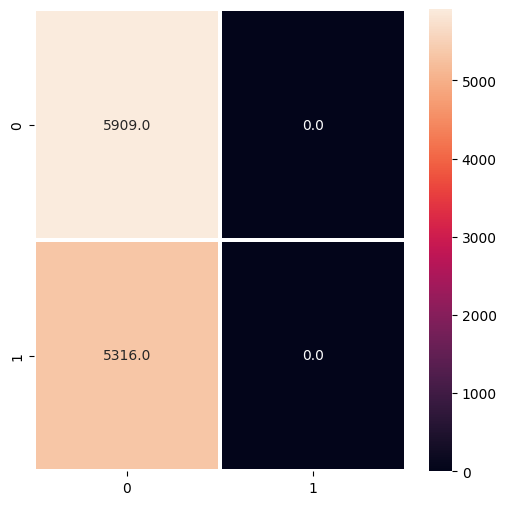

In [33]:
confusion_matrix = confusion_matrix(y_pred=y_pred,y_true=Y_test)

fig,ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix,annot=True,fmt="0.1f",linewidths=1.5)
plt.show()

##Importing The Data

In [8]:
import pandas as pd

df = pd.read_csv('cleaned-dataset/cleaned-datasets.csv')

In [9]:
df.head()

,Unnamed: 0,title,text,subject,date,label
0,0,"['donald', 'trump', 'send', 'embarrass', 'new'...","['donald', 'trump', 'wish', 'american', 'happi...",['news'],"['decemb', '31', '2017']",1
1,1,"['drunk', 'brag', 'trump', 'staffer', 'start',...","['hous', 'intellig', 'committe', 'chairman', '...",['news'],"['decemb', '31', '2017']",1
2,2,"['sheriff', 'david', 'clark', 'becom', 'intern...","['friday', 'reveal', 'former', 'milwauke', 'sh...",['news'],"['decemb', '30', '2017']",1
3,3,"['trump', 'obsess', 'even', 'obama', 'name', '...","['christma', 'day', 'donald', 'trump', 'announ...",['news'],"['decemb', '29', '2017']",1
4,4,"['pope', 'franci', 'call', 'donald', 'trump', ...","['pope', 'franci', 'use', 'annual', 'christma'...",['news'],"['decemb', '25', '2017']",1


##vectorize and split into train and test sets

In [10]:
vectorizer_title = CountVectorizer(stop_words="english",max_features=1000)
vectorizer_text = CountVectorizer(stop_words="english",max_features=4000)

title_matrix = vectorizer_title.fit_transform(df['text']).toarray()
text_matrix = vectorizer_text.fit_transform(df['title']).toarray()

In [11]:
df.head()

,Unnamed: 0,title,text,subject,date,label
0,0,"['donald', 'trump', 'send', 'embarrass', 'new'...","['donald', 'trump', 'wish', 'american', 'happi...",['news'],"['decemb', '31', '2017']",1
1,1,"['drunk', 'brag', 'trump', 'staffer', 'start',...","['hous', 'intellig', 'committe', 'chairman', '...",['news'],"['decemb', '31', '2017']",1
2,2,"['sheriff', 'david', 'clark', 'becom', 'intern...","['friday', 'reveal', 'former', 'milwauke', 'sh...",['news'],"['decemb', '30', '2017']",1
3,3,"['trump', 'obsess', 'even', 'obama', 'name', '...","['christma', 'day', 'donald', 'trump', 'announ...",['news'],"['decemb', '29', '2017']",1
4,4,"['pope', 'franci', 'call', 'donald', 'trump', ...","['pope', 'franci', 'use', 'annual', 'christma'...",['news'],"['decemb', '25', '2017']",1


In [12]:
# df.drop(["title","text"],axis=1,inplace=True)
# df.info()

In [13]:
print(df.shape)
print(title_matrix.shape)
print(text_matrix.shape)

(44898, 6)
(44898, 1000)
(44898, 4000)


In [14]:
# Creating Y
y = df.label
# Creating X
x = np.concatenate((np.array(df.drop("label",axis=1)),title_matrix,text_matrix),axis=1)

In [15]:
print(x.shape)
print(y.shape)

(44898, 5005)
(44898,)


In [16]:
print(x)

[[0
  "['donald', 'trump', 'send', 'embarrass', 'new', 'year', 'eve', 'messag', 'disturb']"
  "['donald', 'trump', 'wish', 'american', 'happi', 'new', 'year', 'leav', 'instead', 'give', 'shout', 'enemi', 'hater', 'dishonest', 'fake', 'news', 'medium', 'former', 'realiti', 'show', 'star', 'one', 'job', 'countri', 'rapidli', 'grow', 'stronger', 'smarter', 'want', 'wish', 'friend', 'support', 'enemi', 'hater', 'even', 'dishonest', 'fake', 'news', 'medium', 'happi', 'healthi', 'new', 'year', 'presid', 'angri', 'pant', 'tweet', '2018', 'great', 'year', 'america', 'countri', 'rapidli', 'grow', 'stronger', 'smarter', 'want', 'wish', 'friend', 'support', 'enemi', 'hater', 'even', 'dishonest', 'fake', 'news', 'medium', 'happi', 'healthi', 'new', 'year', '2018', 'great', 'year', 'america', 'donald', 'j', 'trump', 'realdonaldtrump', 'decemb', '31', '2017trump', 'tweet', 'went', 'welll', 'expectwhat', 'kind', 'presid', 'send', 'new', 'year', 'greet', 'like', 'despic', 'petti', 'infantil', 'gibberi

In [17]:
# Split into train and test sets
X_train,X_test,Y_train,Y_test = train_test_split(x,np.array(y),test_size=0.25,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(33673, 5005)
(11225, 5005)
(33673,)
(11225,)


##Building Model Using Pytorch

In [18]:
class ANN(nn.Module):

    def __init__(self):

        super(ANN,self).__init__() # Inhertiting

        self.linear1 = nn.Linear(5008,2000) # IN 5008 OUT 2000
        self.relu1 = nn.ReLU() # Actfunc 1

        self.linear2 = nn.Linear(2000,500) # IN 2000 OUT 500
        self.relu2 = nn.ReLU()

        self.linear3 = nn.Linear(500,100) # IN 500 OUT 100
        self.relu3 = nn.ReLU()

        self.linear4 = nn.Linear(100,20) # IN 100 OUT 20
        self.relu4 = nn.ReLU()

        self.linear5 = nn.Linear(20,2) # IN 20 OUT 2 | OUTPUT


    def forward(self,x):

        out = self.linear1(x) # Input Layer
        out = self.relu1(out)

        out = self.linear2(out) # Hidden Layer 1
        out = self.relu2(out)

        out = self.linear3(out) # Hidden Layer 2
        out = self.relu3(out)

        out = self.linear4(out) # Hidden Layer 3
        out = self.relu4(out)


        out = self.linear5(out) # Output Layer

        return out


model = ANN()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
error = nn.CrossEntropyLoss()

In [21]:
from gensim.models import Word2Vec
import numpy as np

# Train Word2Vec on your preprocessed text data
word2vec_model = Word2Vec(sentences=train_texts, size=100, window=5, min_count=1, workers=4)

# Get the word embeddings from the Word2Vec model
word_embeddings = word2vec_model.wv

# Convert text sequences to Word2Vec embeddings
train_embeddings = []
for sequence in train_sequences:
    sequence_embeddings = [word_embeddings[word] for word in sequence if word in word_embeddings]
    if len(sequence_embeddings) > 0:
        sequence_embeddings = np.vstack(sequence_embeddings)
        mean_embedding = np.mean(sequence_embeddings, axis=0)
        train_embeddings.append(mean_embedding)
train_embeddings = np.vstack(train_embeddings)

test_embeddings = []
for sequence in test_sequences:
    sequence_embeddings = [word_embeddings[word] for word in sequence if word in word_embeddings]
    if len(sequence_embeddings) > 0:
        sequence_embeddings = np.vstack(sequence_embeddings)
        mean_embedding = np.mean(sequence_embeddings, axis=0)
        test_embeddings.append(mean_embedding)
test_embeddings = np.vstack(test_embeddings)

# Convert embeddings to PyTorch tensors
X_train = torch.Tensor(train_embeddings)
X_test = torch.Tensor(test_embeddings)

# Convert labels to PyTorch tensors
Y_train = torch.Tensor(train_labels).type(torch.LongTensor)
Y_test = torch.Tensor(test_labels).type(torch.LongTensor)


NameError: ignored

##Fitting Model Using Pytorch

In [19]:
print(X_train)

[[2979
  "['watch', 'trump', 'doesnt', 'want', 'u', 'rememb', 'said', 'russia', '2014']"
  "['time', 'go', 'becom', 'ever', 'clearer', 'trump', 'russia', 'puppet', 'everi', 'possibl', 'owe', 'money', 'repeatedli', 'blast', 'intellig', 'commun', 'dare', 'say', 'russia', 'inde', 'engag', 'concert', 'campaign', 'influenc', 'elect', 'trump', 'favor', 'alway', 'feel', 'way', 'alway', 'russia', 'puppetit', 'seem', 'word', 'know', 'recent', '2014', 'said', 'seri', 'interview', 'mitt', 'romney', 'right', 'say', 'russia', 'greatest', 'geopolit', 'foe', 'mitt', 'said', 'russia', 'hell', 'problem', 'everybodi', 'laugh', 'includ', 'certain', 'medium', 'way', 'laugh', 'turn', 'absolut', 'right', 'look', 'russia', 'iran', 'control', 'situat', 'syria', 'virtual', 'everi', 'place', 'also', 'insinu', 'obama', 'putin', 'puppet', 'felt', 'meek', 'cowardli', 'face', 'threat', 'definit', 'strong', 'definit', 'sanction', 'show', 'strength', 'mean', 'putin', 'eaten', 'obama', 'lunch', 'therefor', 'lunch', 'l

In [20]:
# Converting numpy arrays into pytorch tensors
X_train = torch.Tensor(X_train)

# You must convert it into LongTensor. I did it once
Y_train = torch.Tensor(Y_train).type(torch.LongTensor)

X_test = torch.Tensor(X_test)
Y_test = torch.Tensor(Y_test)

EPOCHS = 20

for epoch in range(EPOCHS):

    # Clearing gradients
    optimizer.zero_grad()

    # Forward Propagation
    outs = model(X_train)

    # Computing Loss
    loss = error(outs,Y_train)

    # Backward propagation
    loss.backward()

    # Updating parameters
    optimizer.step()

    # Printing loss
    print(f"Loss after iteration {epoch} is {loss}")


TypeError: ignored